In [1]:
library(immunarch)  # Load the package into R
immdata <- repLoad("/corgi/martin/R/patient2/")

Loading required package: ggplot2

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: dtplyr

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: patchwork


== Step 1/3: loading repertoire files... ==


Processing "/corgi/martin/R/patient2/" ...

  -- [1/12] Parsing "/corgi/martin/R/patient2//N3_IGG.txt" -- 
mixcr

  -- [2/12] Parsing "/corgi/martin/R/patient2//N3_IGK.txt" -- 
mixcr

  -- [3/12] Parsing "/corgi/martin/R/patient2//N3_IGL.txt" -- 
mixcr

  -- [4/12] Parsing "/corgi/martin/R/patient2//N3_IGM.txt" -- 
mixcr

  -- [5/12] Parsing "/corgi/martin/R/patient2//P3_IGG.txt" -- 
mixcr

  -- [6/12] Parsing "/corgi/martin/R/patient2//P3_IGK.txt" -- 


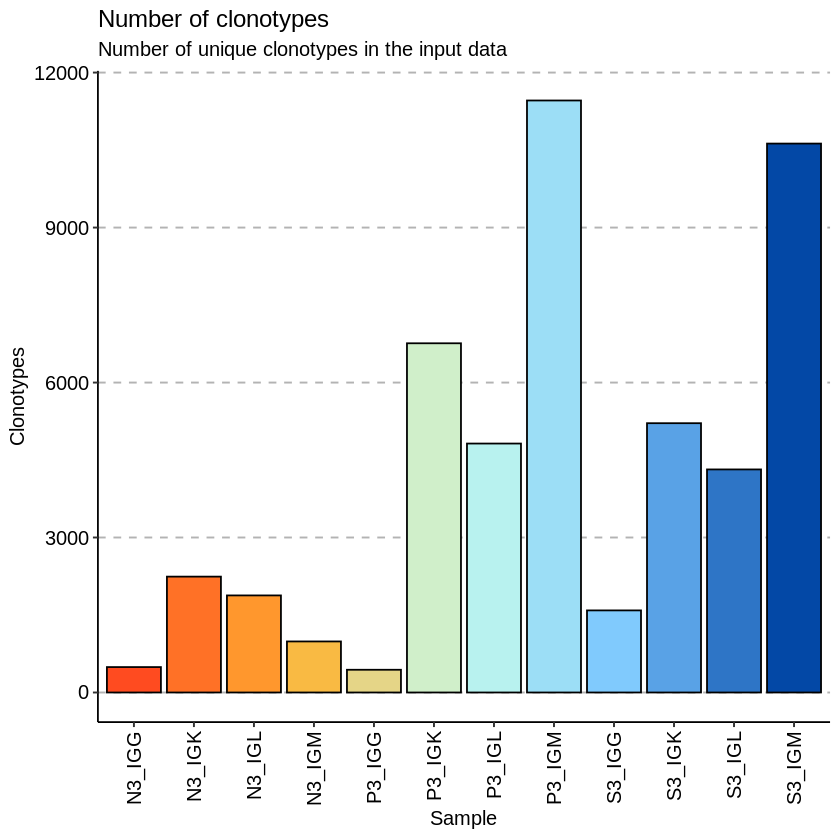

In [2]:
exp_vol <- repExplore(immdata$data, .method = "volume")
p1 <- vis(exp_vol)
p1 
ggsave(filename = "FIGURE_clonotype_p2.png", plot = p1, width = 4.8, height = 4.5, dpi = 600)

Warning message:
“Ignoring unknown aesthetics: xmin, xmax, annotations, y_position”


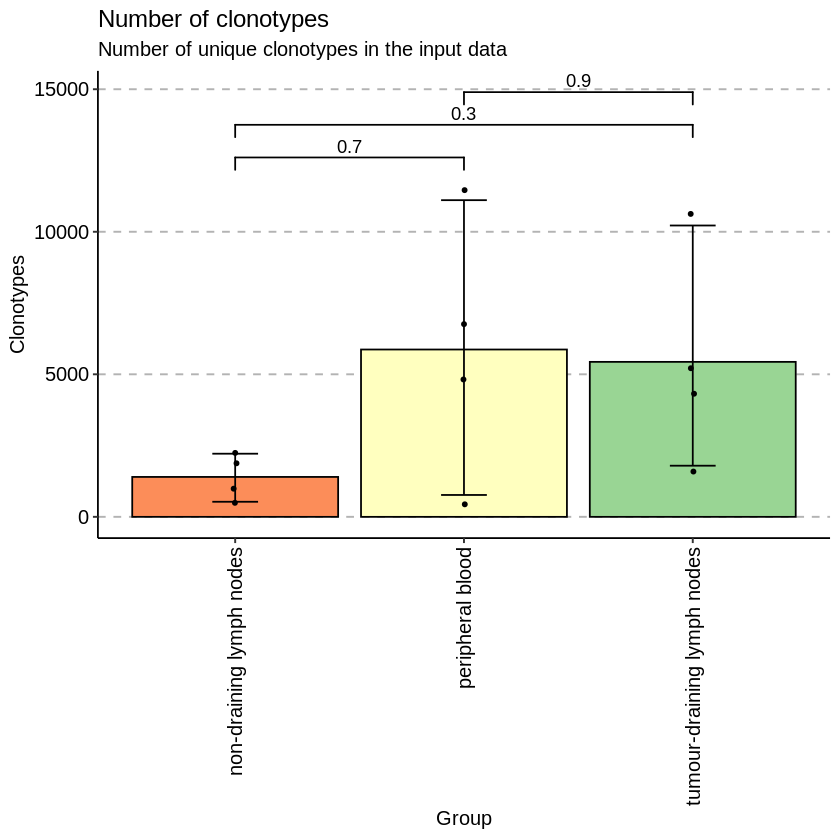

In [16]:
exp_vol <- repExplore(immdata$data, .method = "volume")
by_vec <- c("non-draining lymph nodes", "non-draining lymph nodes", "non-draining lymph nodes", "non-draining lymph nodes", "peripheral blood", "peripheral blood", "peripheral blood", "peripheral blood", "tumour-draining lymph nodes", "tumour-draining lymph nodes", "tumour-draining lymph nodes", "tumour-draining lymph nodes")
p <- vis(exp_vol, .by = by_vec)
p

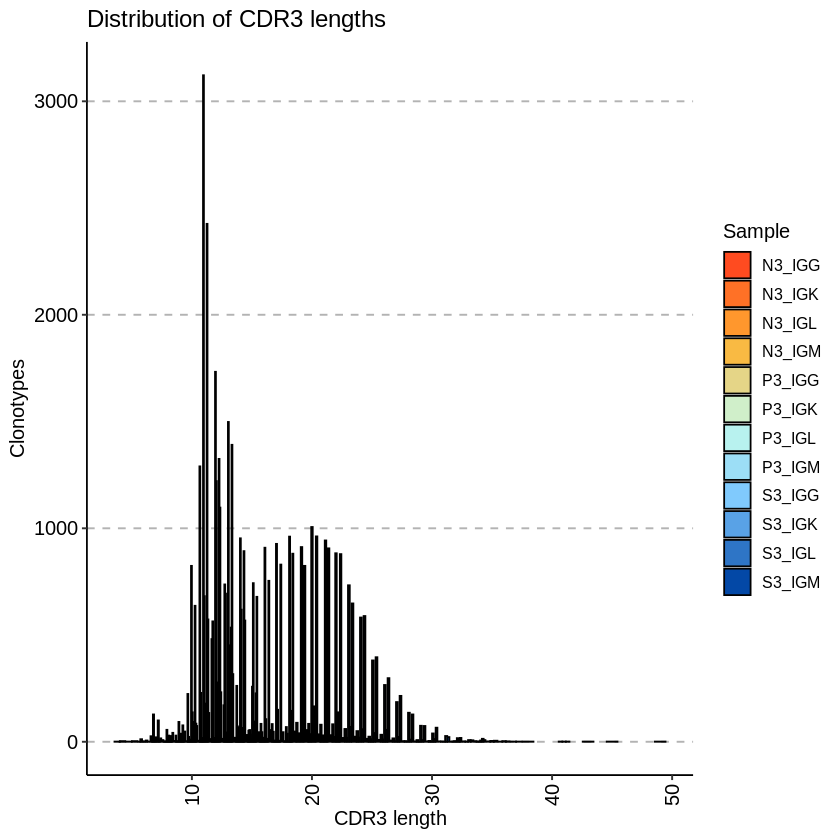

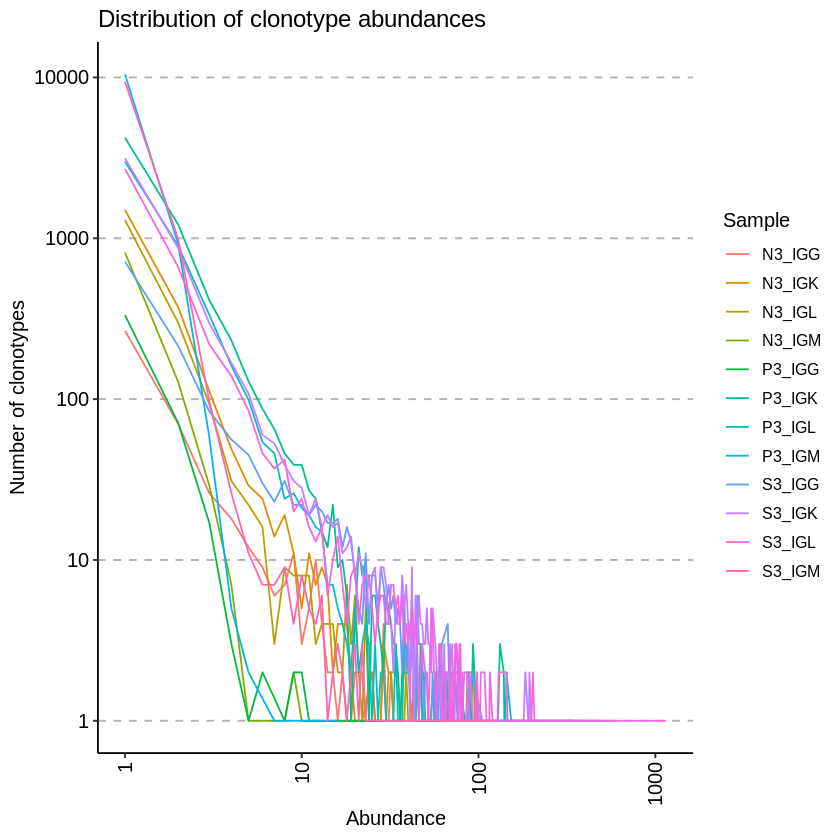

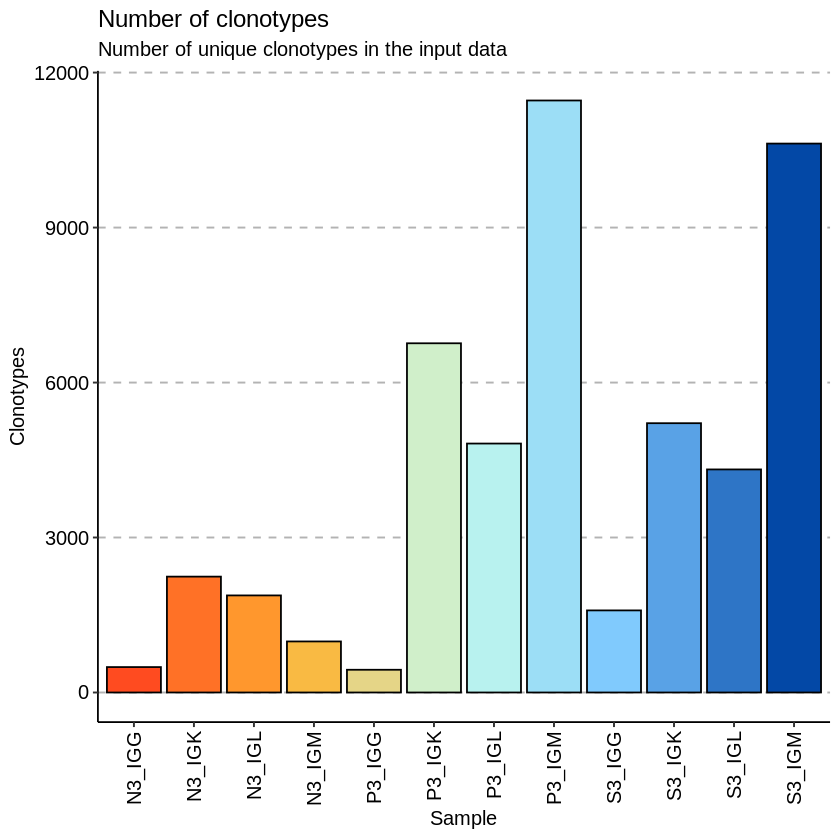

In [4]:
exp_len <- repExplore(immdata$data, .method = "len", .col = "aa")
exp_cnt <- repExplore(immdata$data, .method = "count")
exp_vol <- repExplore(immdata$data, .method = "volume")

p1 <- vis(exp_len)
p2 <- vis(exp_cnt)
p3 <- vis(exp_vol)

p1
p2
p3

In [3]:
#The clonal.prop method computes the proportion of repertoire occupied by the pools of cell clones:
imm_pr <- repClonality(immdata$data, .method = "clonal.prop")
imm_pr

,Clones,Percentage,Clonal.count.prop
N3_IGG,3,13.0,0.0060975610
N3_IGK,2,11.5,0.0008916630
N3_IGL,3,11.7,0.0015965939
N3_IGM,17,10.2,0.0172064777
P3_IGG,3,10.1,0.0068181818
P3_IGK,12,10.4,0.0017751479
P3_IGL,10,10.7,0.0020751193
P3_IGM,578,10.0,0.0504363002
S3_IGG,7,10.4,0.0044052863
S3_IGK,9,10.6,0.0017264531


In [6]:
# The top method considers the most abundant cell clonotypes:
imm_top <- repClonality(immdata$data, .method = "top", .head = c(10, 100, 1000, 3000, 10000))
imm_top

,10,100,1000,3000,10000
N3_IGG,0.284102926,0.78286923,1.0000000,1.0000000,1.0000000
N3_IGK,0.267748716,0.58979449,0.8548575,1.0000000,1.0000000
N3_IGL,0.254662946,0.60801880,0.8709062,1.0000000,1.0000000
N3_IGM,0.081775701,0.25233645,1.0000000,1.0000000,1.0000000
P3_IGG,0.224299065,0.53671562,1.0000000,1.0000000,1.0000000
P3_IGK,0.091248288,0.32276957,0.6399660,0.8224153,1.0000000
P3_IGL,0.106728704,0.35712241,0.6676450,0.8697924,1.0000000
P3_IGM,0.004939845,0.02390248,0.1666003,0.3259501,0.8836746
S3_IGG,0.124963862,0.45576756,0.9574299,1.0000000,1.0000000
S3_IGK,0.112911542,0.39968329,0.7978198,0.9185019,1.0000000


In [7]:
# While the rare method deals with the least prolific clonotypes:
imm_rare <- repClonality(immdata$data, .method = "rare")
imm_rare

,1,3,10,30,100,MAX
N3_IGG,0.09376102,0.1706027,0.3161791,0.5995770,0.9016567,1
N3_IGK,0.17550210,0.3018449,0.4050677,0.5186829,0.7436945,1
N3_IGL,0.19077691,0.3192833,0.4037304,0.5467763,0.7305037,1
N3_IGM,0.63551402,0.9026480,0.9563863,1.0000000,1.0000000,1
P3_IGG,0.44459279,0.7022697,0.8024032,1.0000000,1.0000000,1
P3_IGK,0.19931044,0.3727861,0.5456005,0.6975393,0.8634109,1
P3_IGL,0.21438797,0.4145311,0.5878311,0.7084467,0.8777380,1
P3_IGM,0.83411680,0.9950602,0.9987252,1.0000000,1.0000000,1
S3_IGG,0.05174906,0.1008962,0.2061289,0.5026742,0.8883348,1
S3_IGK,0.11559991,0.2124549,0.3160860,0.4749208,0.7713781,1


In [8]:
# Finally, the homeo method assesses the clonal space homeostasis, i.e., the proportion of the repertoire occupied by the clones of a given size:
imm_hom <- repClonality(immdata$data,
  .method = "homeo",
  .clone.types = c(Small = .0001, Medium = .001, Large = .01, Hyperexpanded = 1)
)
imm_hom

,Small (0 < X <= 1e-04),Medium (1e-04 < X <= 0.001),Large (0.001 < X <= 0.01),Hyperexpanded (0.01 < X <= 1)
N3_IGG,0.00000000,0.1431089,0.405005287,0.45188579
N3_IGK,0.00000000,0.3876693,0.291219057,0.32111163
N3_IGL,0.00000000,0.3677486,0.303421942,0.32882949
N3_IGM,0.00000000,0.6355140,0.320872274,0.04361371
P3_IGG,0.00000000,0.0000000,0.740987984,0.25901202
P3_IGK,0.31426817,0.3282010,0.318896708,0.03863411
P3_IGL,0.21438797,0.4161059,0.297566213,0.07193987
P3_IGM,0.83411680,0.1646084,0.001274799,0.00000000
S3_IGG,0.05174906,0.2073576,0.671509107,0.06938422
S3_IGK,0.17975252,0.2685424,0.469949179,0.08175591


Using Sample as id variables

Using Sample as id variables



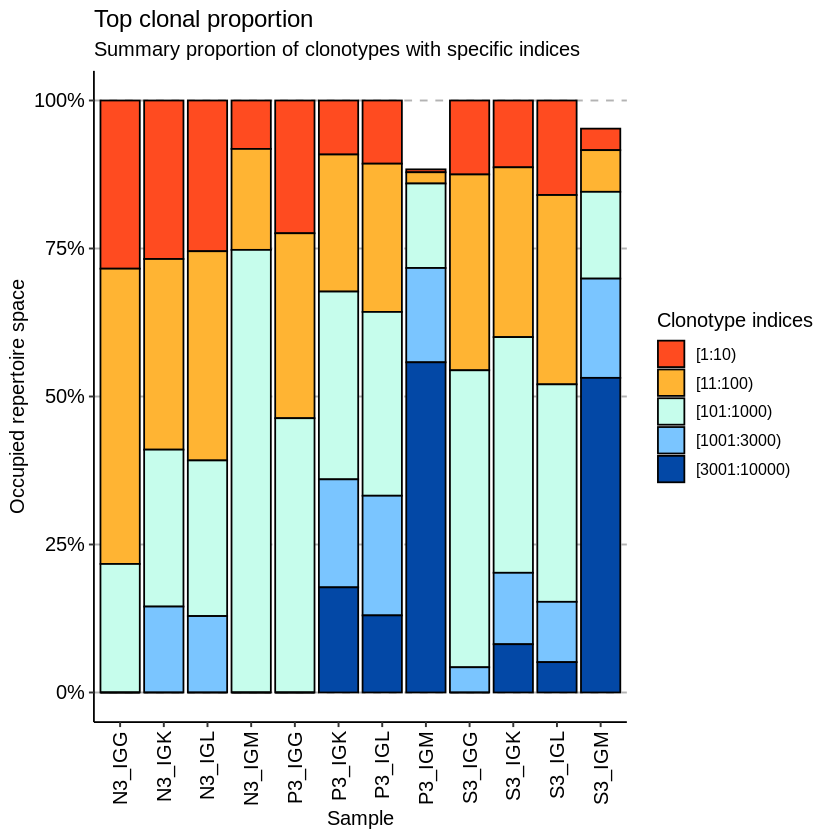

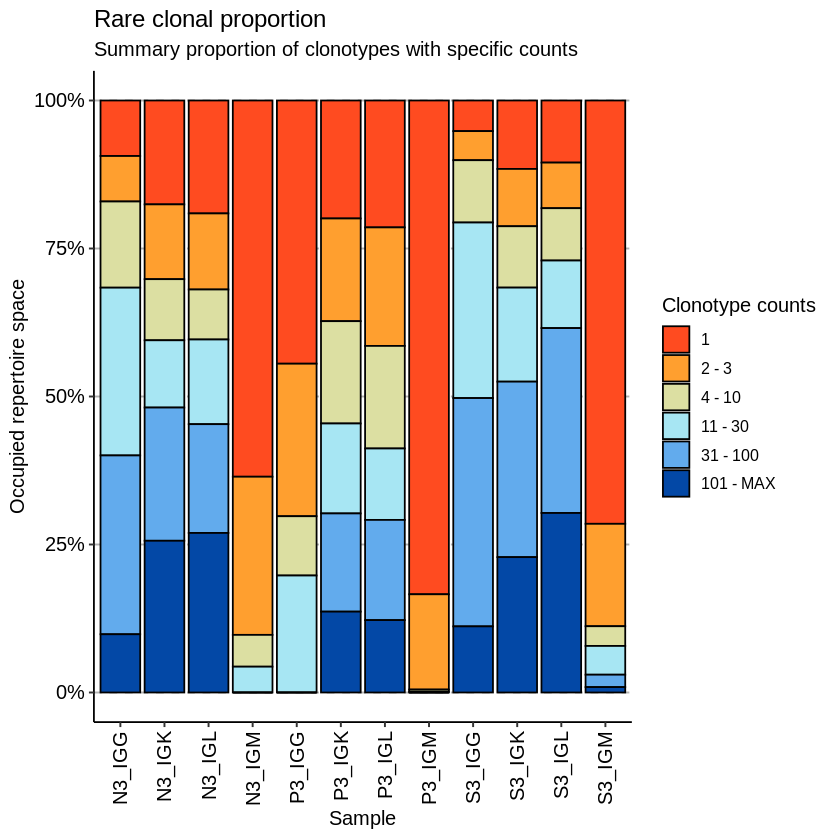

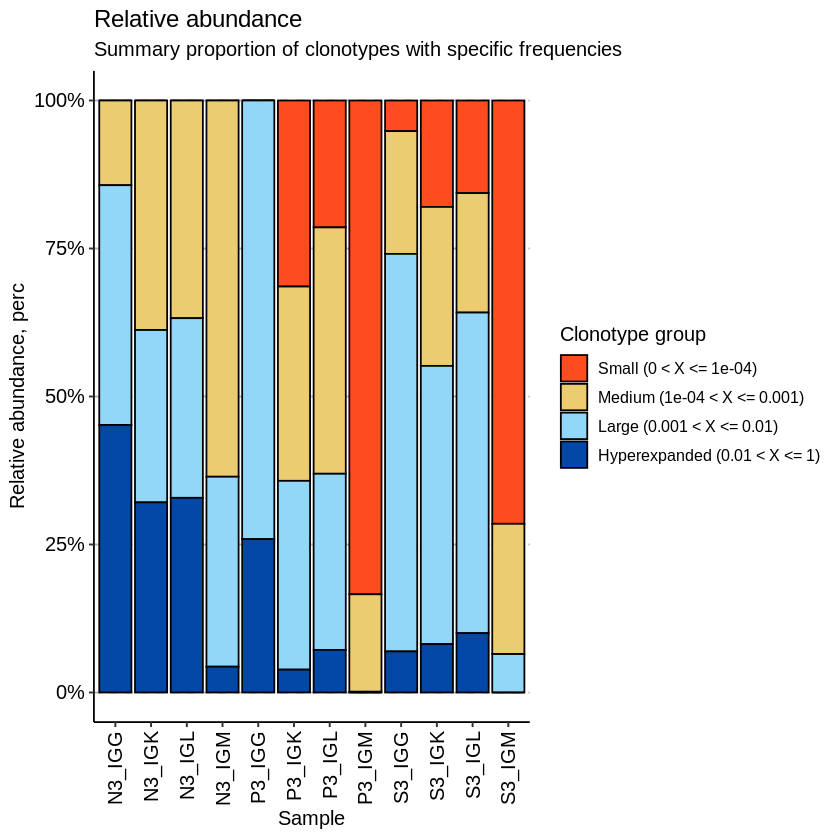

In [9]:
p1 <- vis(imm_top)
p2 <- vis(imm_rare)
p3 <- vis(imm_hom)
p1
p2
p3

ggsave(filename = "FIGURE_abundancy_p2.png", plot = p3, width = 6, height = 5, dpi = 600)

In [10]:
gene_stats()

alias,species,ighd,ighj,ighv,igij,igkj,igkv,iglj,iglv,traj,trav,trbd,trbj,trbv,trdd,trdj,trdv,trgj,trgv
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bt,BosTaurus,21,4,25,0,1,6,5,26,46,0,0,0,0,5,3,0,6,15
cd,CamelusDromedarius,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2,2
clf,CanisLupusFamiliaris,0,0,0,0,0,0,0,0,0,0,2,8,19,0,0,0,7,8
dr,DanioRerio,7,7,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
hs,HomoSapiens,30,13,248,0,5,64,7,69,57,60,3,14,64,3,4,6,4,10
macmul,MacacaMulatta,24,7,19,0,4,83,5,0,0,0,2,15,58,0,0,0,0,0
mmc,MusMusculusCastaneus,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0
mmd,MusMusculusDomesticus,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
musmus,MusMusculus,32,8,225,0,8,109,3,5,42,145,2,14,23,2,3,7,0,11


In [11]:
imm_gu <- geneUsage(immdata$data, "hs.trbv")
imm_gu

Names,N3_IGG,N3_IGK,N3_IGL,N3_IGM,P3_IGG,P3_IGK,P3_IGL,P3_IGM,S3_IGG,S3_IGK,S3_IGL,S3_IGM
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
IGHV1-18,11,NA,NA,19,15,NA,NA,411,72,NA,NA,536
"IGHV1-18, IGHV1-2, IGHV1-3",NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,2
"IGHV1-18, IGHV1-2, IGHV1-46",NA,NA,NA,NA,NA,NA,NA,4,NA,NA,NA,3
"IGHV1-18, IGHV1-2, IGHV1-8",NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
"IGHV1-18, IGHV1-46, IGHV1-67",NA,NA,NA,NA,NA,NA,NA,3,NA,NA,NA,1
"IGHV1-18, IGHV1-69, IGHV1-2",NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA
"IGHV1-18, IGHV1-69, IGHV1-46",NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1
"IGHV1-18, IGHV1-69, IGHV1-8",NA,NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA
"IGHV1-18, IGHV1-8, IGHV1-46",NA,NA,NA,NA,NA,NA,NA,1,NA,NA,NA,NA


Using Names as id variables

Warning message:
“Removed 8 rows containing missing values (geom_bar).”


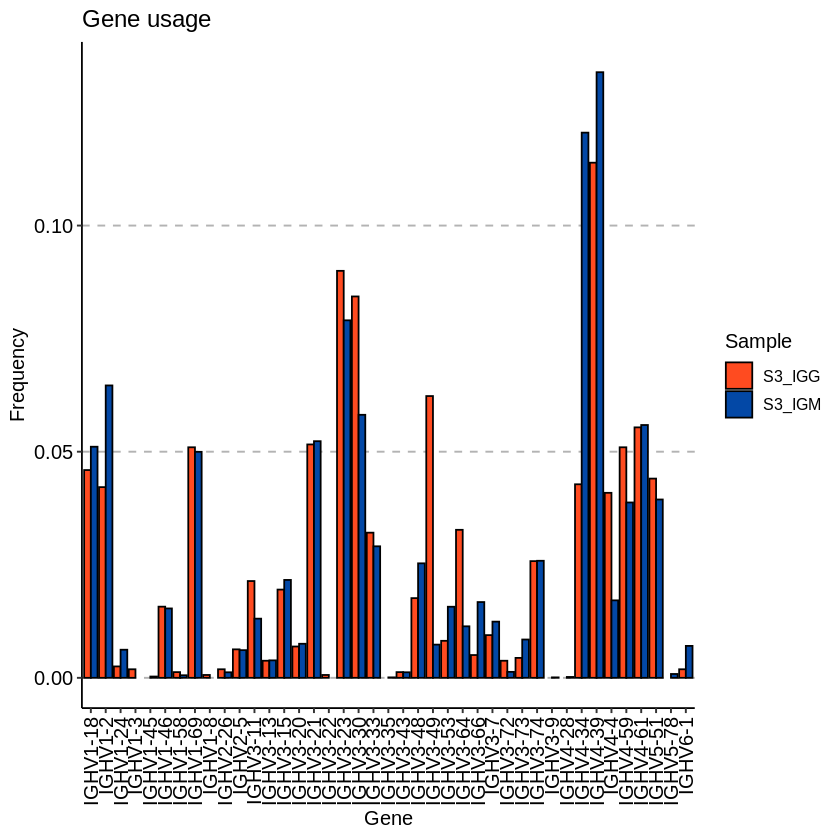

In [17]:
# Compute the distribution of  two selected samples
imm_gu <- geneUsage(immdata$data[c(9, 12)], "hs.trbv", .norm = T, .ambig = "maj")

vis(imm_gu)

Using Names as id variables

Warning message:
“Removed 61 rows containing missing values (geom_bar).”


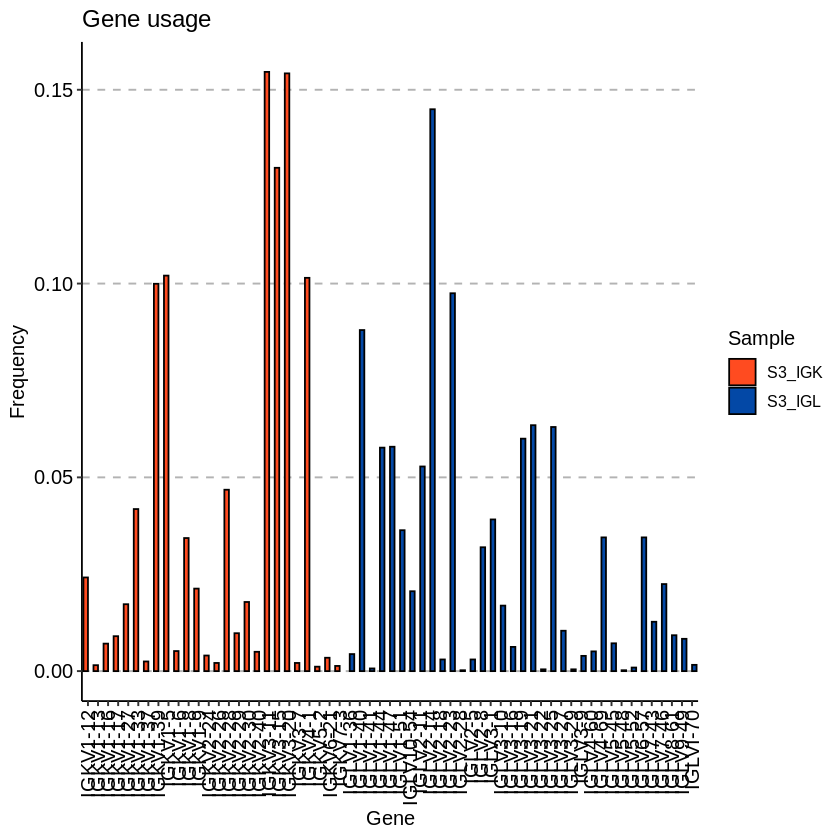

In [18]:
# Compute the distribution of the first two samples
imm_gu <- geneUsage(immdata$data[c(10, 11)], "hs.trbv", .norm = T, .ambig = "maj")

vis(imm_gu)

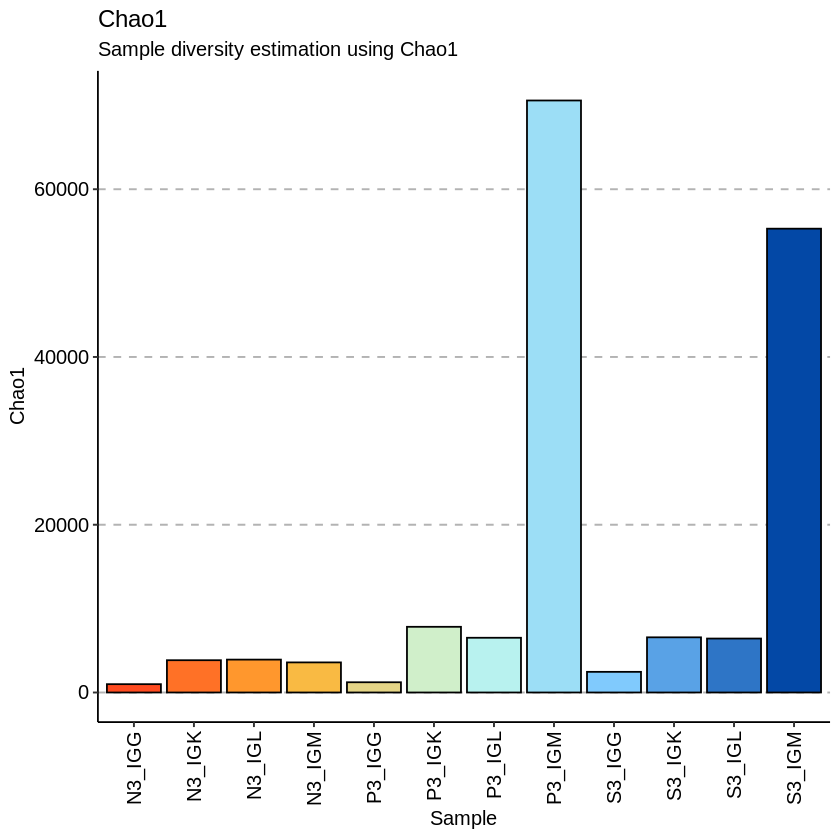

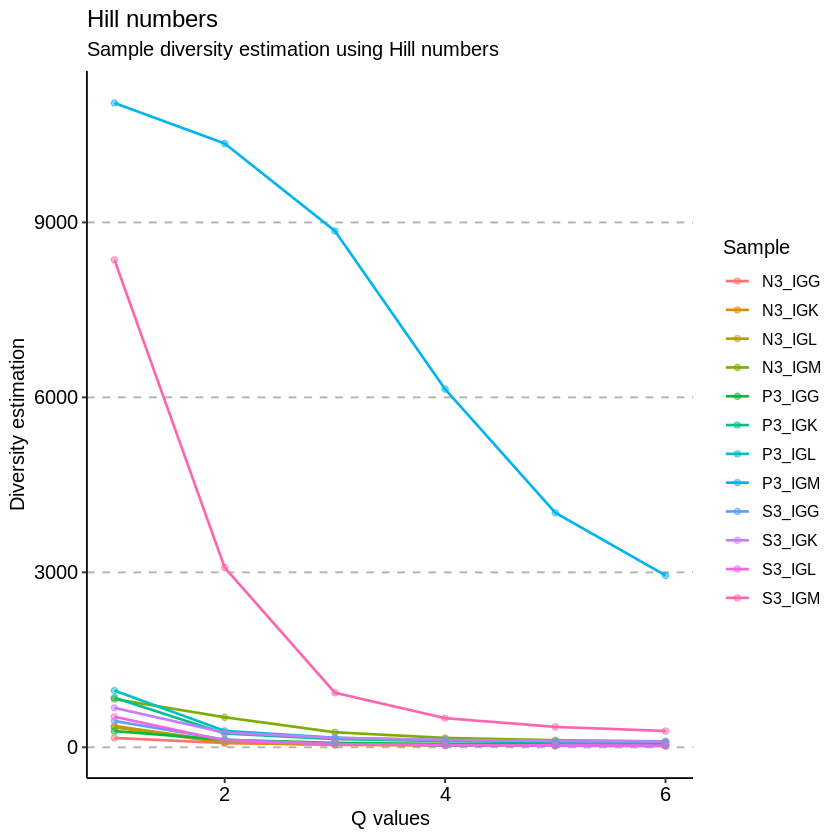

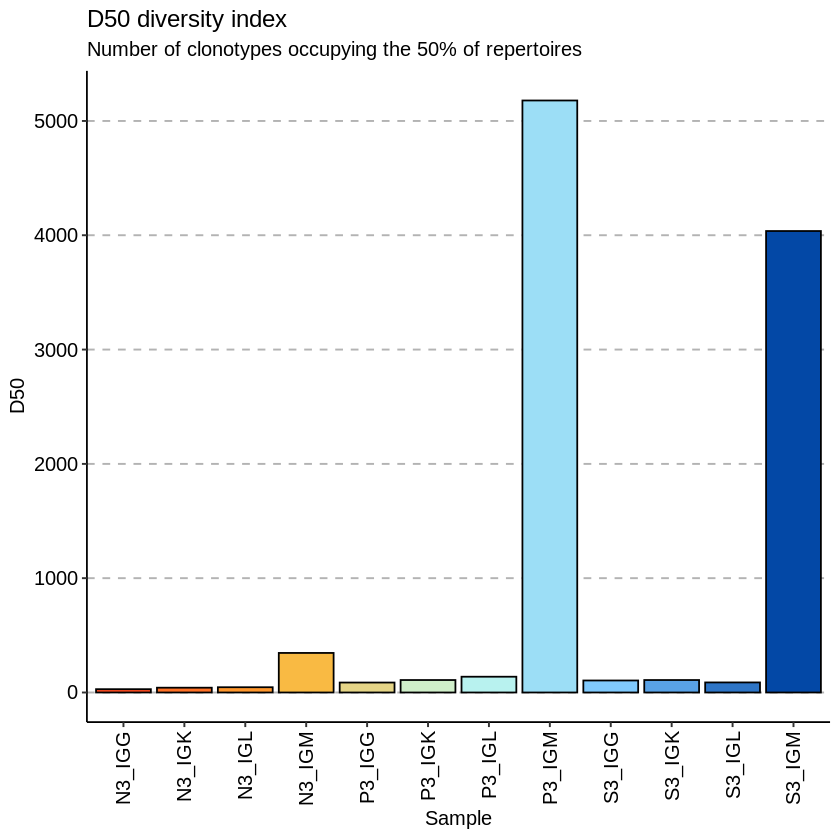

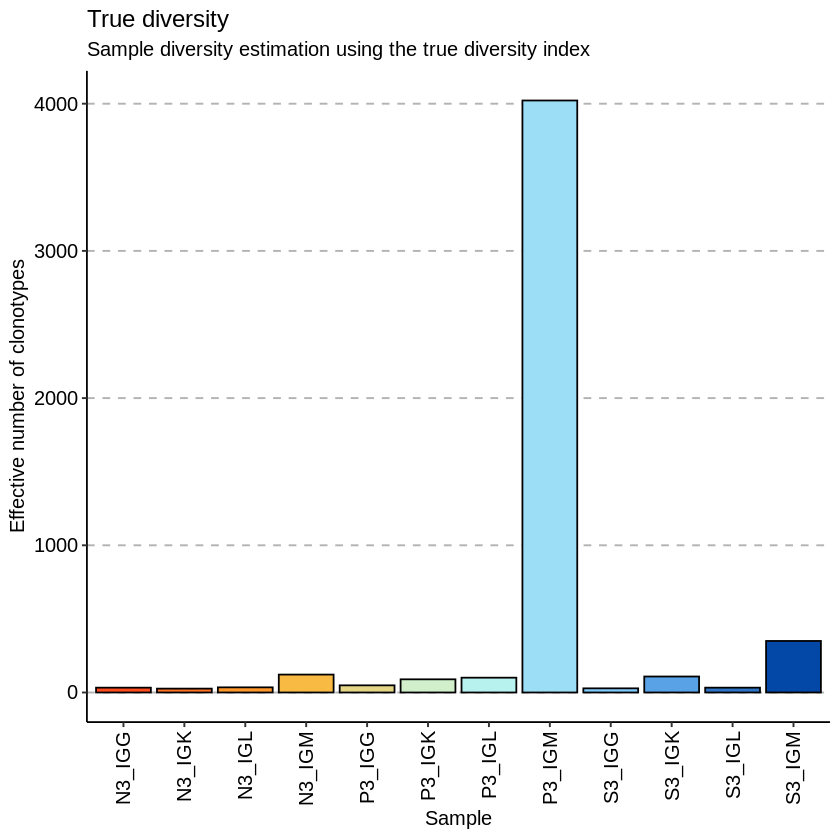

In [3]:
# Compute statistics and visualise them
# Chao1 diversity measure
div_chao <- repDiversity(immdata$data, "chao1")

# Hill numbers
div_hill <- repDiversity(immdata$data, "hill")

# D50
div_d50 <- repDiversity(immdata$data, "d50")

# Ecological diversity measure
div_div <- repDiversity(immdata$data, "div")

p1 <- vis(div_chao)
p2 <- vis(div_hill)
p3 <- vis(div_d50)
p4 <- vis(div_div)

p1
p2
p3
p4

ggsave(filename = "FIGURE_div50_p2.png", plot = p3, width = 4.8, height = 4.5, dpi = 600)

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


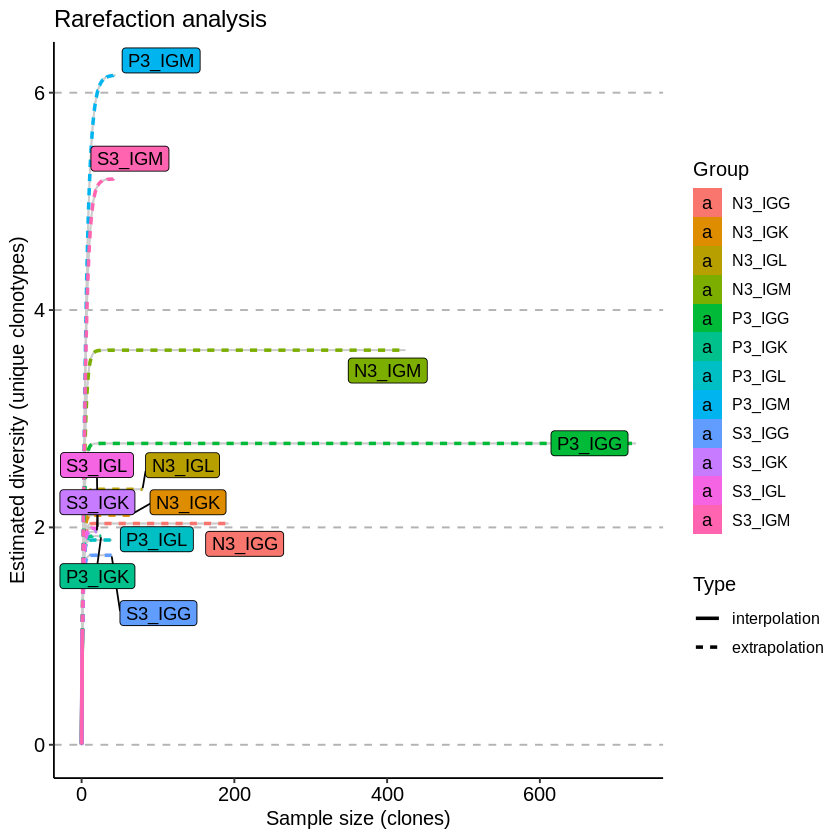

In [13]:
imm_raref <- repDiversity(immdata$data, "raref", .verbose = F)

p1 <- vis(imm_raref)
p1

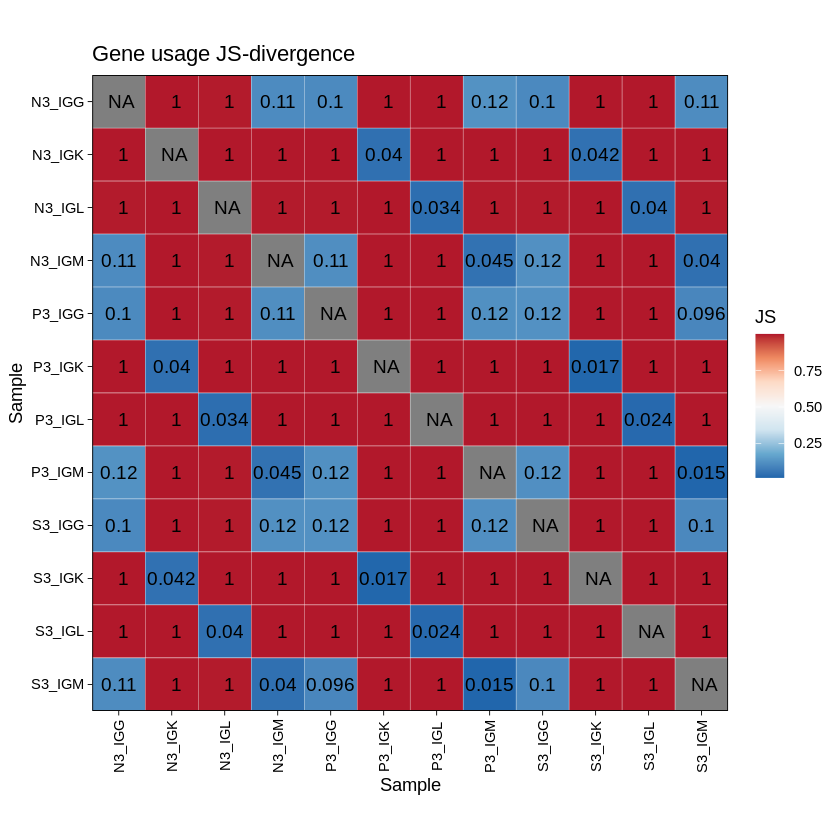

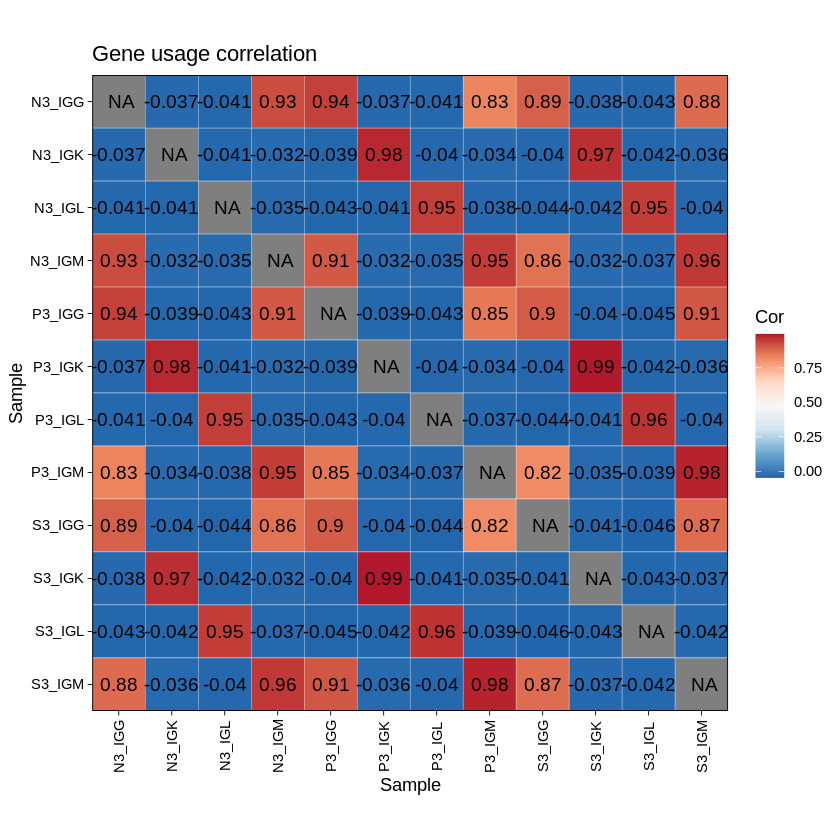

In [14]:
imm_gu <- geneUsage(immdata$data, "hs.trbv", .norm = T)

imm_gu_js <- geneUsageAnalysis(imm_gu, .method = "js", .verbose = F)
imm_gu_cor <- geneUsageAnalysis(imm_gu, .method = "cor", .verbose = F)

p1 <- vis(imm_gu_js, .title = "Gene usage JS-divergence", .leg.title = "JS", .text.size = 4)
p2 <- vis(imm_gu_cor, .title = "Gene usage correlation", .leg.title = "Cor", .text.size = 4)

p1
p2

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


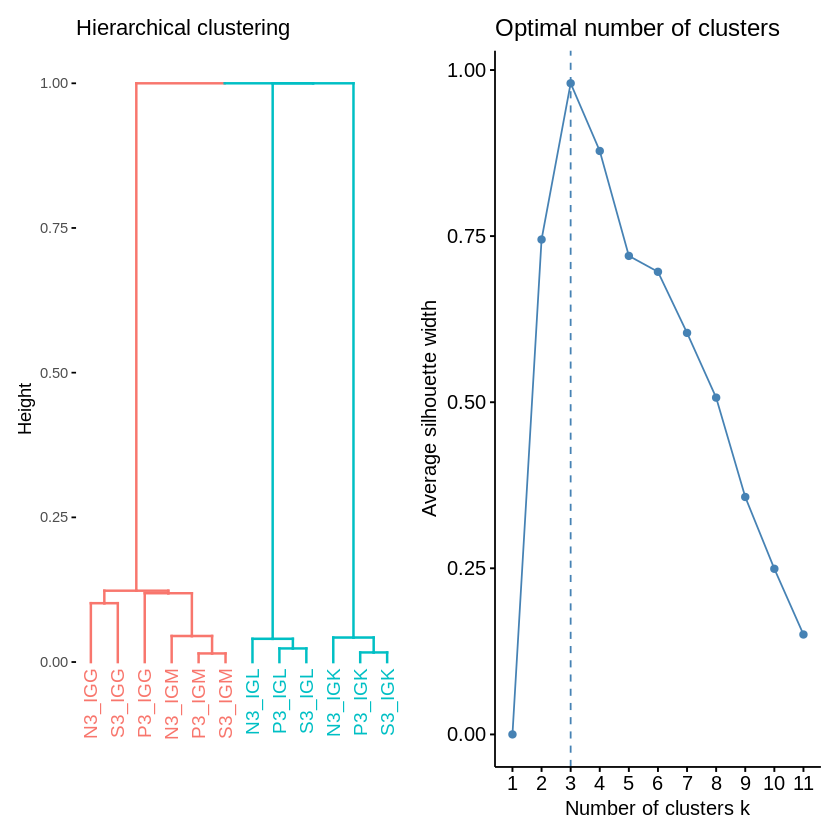

In [15]:
imm_gu <- geneUsage(immdata$data, "hs.trbv", .norm = T)
vis(imm_gu_js <- geneUsageAnalysis(imm_gu, .method = "js+hclust", .verbose = F))

Warning message in melt.data.table(.data):
“id.vars and measure.vars are internally guessed when both are 'NULL'. All non-numeric/integer/logical type columns are considered id.vars, which in this case are columns [CDR3.aa, ...]. Consider providing at least one of 'id' or 'measure' vars in future.”
Warning message:
“`spread_()` was deprecated in tidyr 1.2.0.
Please use `spread()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”
Warning message:
“The `.dots` argument of `group_by()` is deprecated as of dplyr 1.0.0.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


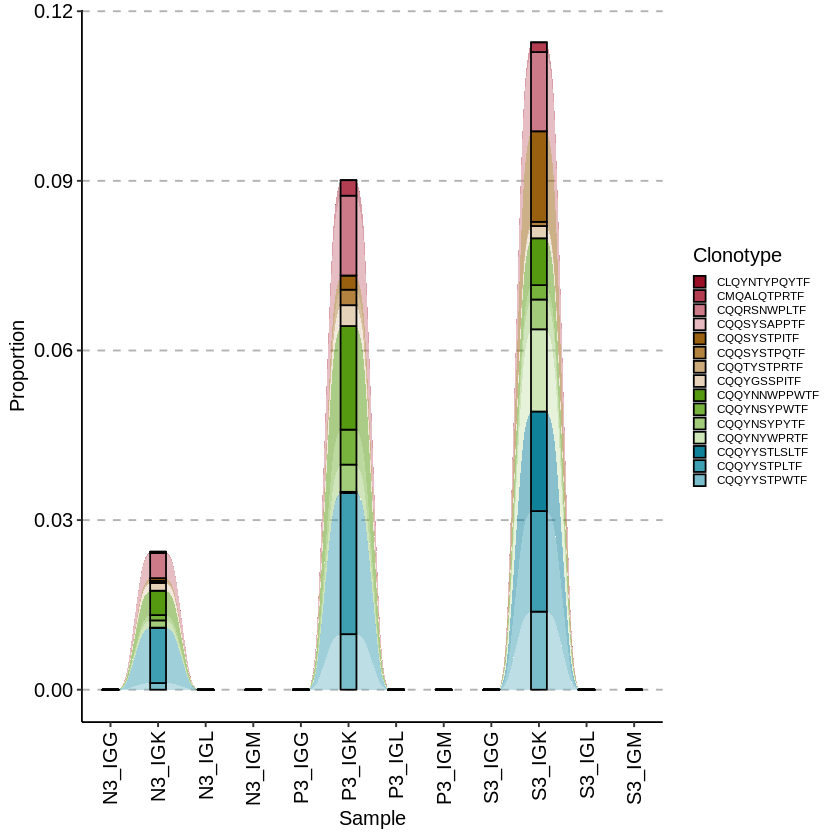

In [2]:
library(pals)
target <- c("CQQYYSTPWTF", "CQQYNSYPYTF", "CQQSYSAPPTF", "CQQTYSTPRTF", "CQQYNNWPPWTF", "CQQYYSTPLTF", "CQQYYSTLSLTF", "CQQSYSTPITF", "CQQYNYWPRTF", "CQQRSNWPLTF", "CQQSYSTPQTF", "CQQYNSYPWTF", "CMQALQTPRTF", "CQQYGSSPITF", "CLQYNTYPQYTF")
tc <- trackClonotypes(immdata$data, target, .col = "aa")
p <- vis(tc) + scale_fill_manual(values=as.vector(stepped(15))) + theme(plot.title = element_blank(), legend.key.size = unit(0.3, 'cm'), legend.key.height = unit(0.3, 'cm'), legend.key.width = unit(0.3, 'cm'), legend.text = element_text(size=7))
p 
ggsave(filename = "FIGURE_p2_IGK_track.png", plot = p, width = 5, height = 4.5, dpi = 600)